In [ ]:
"""
#Program developed by Raul Ramirez Summer 2019
#Monterrey NL rramirez@tec.mx
#based in multiple sources
"""

In [10]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [12]:
# Load datasets from URL
# Get the URL that contains the dataset
urlDataCandidates = 'https://raw.githubusercontent.com/ErenJulianUsta/Data-Science-and-Big-Data-Analytics/main/candidates.csv'
# Read the URL to load datasets
candidates = pd.read_csv(urlDataCandidates)

In [13]:
#Read data
#candidates = pd.read_csv('candidates.csv')
candidates.head(10)

,gmat,gpa,work_experience,admitted
0,708,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [14]:
#Separate dependent and independent variables
X = candidates[['gmat', 'gpa','work_experience']]
y = candidates['admitted']

In [15]:
#Separate train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.80,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
#Fit classifier with train data
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [17]:
#Predict test data
y_pred=logistic_regression.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
#Get right and wrong classifications
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[13  0]
 [ 0 19]]


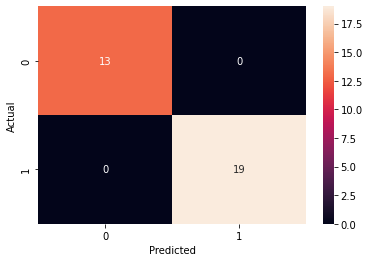

In [20]:
#Pretty print confusion matrix
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

In [21]:
tn, fp, fn, tp

(13, 0, 0, 19)

In [22]:
#Get performance measures
from sklearn.metrics import classification_report

In [23]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [24]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))

Likelihood Ratio inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [25]:
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Accuracy= 1.0
